# Lecture 5: Qubits

We have touched on qubits in previous lectures, but this is where we are going to deep dive even further.

### 5.1 The Basics

**|ψ⟩ = α|0⟩ + β|1⟩** where:

- α is the probability of it being 0
- β is the probability of it being 1

**α and β are complex probability amplitudes that determine the state of the qubit. The coefficients α and β must satisfy the normalization condition |α|^2 + |β|^2 = 1**

In [12]:
using Yao, Random

α = rand()
β = sqrt(1 - a^2)

ψ = [0,1]

ψ = α * ψ[1] .+ b * ψ[2]

println(ψ)

0.8534261417038969


### 5.2 The Gates

<style>
  table {
    border-collapse: collapse;
  }
  th, td {
    border: 2px solid black;
    padding: 8px;
    text-align: center;
  }
</style>

<table>
  <thead>
    <tr>
      <th>The X gate</th>
      <th>The Y gate</th>
      <th>The Z gate</th>
      <th>The H gate</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>
          <span style="color:blue; font-weight:bold;">α|0⟩ + β|1⟩</span>
          <span style="color:black; font-weight:bold;"> changes to </span>
          <span style="color:red; font-weight:bold;">α|1⟩ + β|0⟩</span>
      </td>
       <td>
          <span style="color:blue; font-weight:bold;">α|0⟩ + β|1⟩</span>
          <span style="color:black; font-weight:bold;"> changes to </span>
          <span style="color:red; font-weight:bold;">β|0⟩ - α|1⟩</span>
      </td>
       <td>
          <span style="color:blue; font-weight:bold;">α|0⟩ + β|1⟩</span>
          <span style="color:black; font-weight:bold;"> changes to </span>
          <span style="color:red; font-weight:bold;">α|0⟩ - β|1⟩</span>
      </td>
       <td>
          <span style="color:blue; font-weight:bold;">α|0⟩ + β|1⟩</span>
          <span style="color:black; font-weight:bold;"> changes to </span>
          <span style="color:red; font-weight:bold;">α/&radic;2*(|0⟩ + β|1⟩) + β/&radic;2*(|0⟩ - β|1⟩)</span>
      </td>
    </tr>
  </tbody>
</table>

In [17]:
using QuantumOptics

b = SpinBasis(1//2)
ψ = basisstate(b, 1)

xgate = sigmax(b)
ygate = sigmay(b)
zgate = sigmaz(b)
hadamard = (1 / sqrt(2)) * (sigmax(b) + sigmaz(b))

ψ_x = xgate * ψ
ψ_y = ygate * ψ
ψ_z = zgate * ψ
ψ_h = hadamard * ψ

println("Initial state: \n", ψ)
println("X gate: \n", ψ_x)
println("Y gate: \n", ψ_y)
println("Z gate: \n", ψ_z)
println("H gate: \n", ψ_h)


Initial state: 
Ket(dim=2)
  basis: Spin(1/2)
 1.0 + 0.0im
 0.0 + 0.0im
X gate: 
Ket(dim=2)
  basis: Spin(1/2)
 0.0 + 0.0im
 1.0 + 0.0im
Y gate: 
Ket(dim=2)
  basis: Spin(1/2)
 0.0 + 0.0im
 0.0 + 1.0im
Z gate: 
Ket(dim=2)
  basis: Spin(1/2)
 1.0 + 0.0im
 0.0 + 0.0im
H gate: 
Ket(dim=2)
  basis: Spin(1/2)
 0.7071067811865475 + 0.0im
 0.7071067811865475 + 0.0im


### 5.3 Circuits

Below we are going to display the 4 basic gates

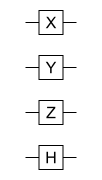

In [3]:
using Yao, YaoPlots

circuit_1 = chain(4, put(1=>X), put(2=>Y), put(3=>Z), put(4=>H));
plot(circuit_1)

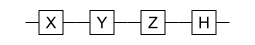

In [2]:
using Yao, YaoPlots

circuit_2 = chain(1, put(1=>X), put(1=>Y), put(1=>Z), put(1=>H));
plot(circuit_2)

Below we define 1 qubit in the form: (1/√2)*(|00>+|11>) 

In [40]:
qubits_1 = ArrayReg(bit"00") + ArrayReg(bit"11") |> normalize!

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [48]:
qubits_1_state = vec(statevec(qubits_1))

4-element Vector{ComplexF64}:
  0.4999999999999999 + 0.0im
  0.4999999999999999 + 0.0im
 -0.4999999999999999 + 0.0im
 -0.4999999999999999 - 0.0im

Feeding the qubits to the second circuit

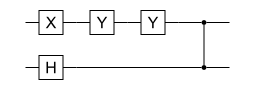

In [43]:
circuit = chain(2, put(1=>X), put(1=>Y), put(1=>Y), put(2=>H), control(1, 2=>Z))
plot(circuit)

In [50]:
out = (qubits_1 |> circuit)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [51]:
out_state = vec(statevec(out))

4-element Vector{ComplexF64}:
                 0.0 + 0.0im
                 0.0 + 0.0im
  0.7071067811865474 + 0.0im
 -0.7071067811865474 - 0.0im

The Bell and Revese Bell Circuits

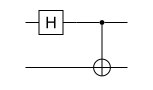

In [76]:
bell_circuit = chain(2, put(1=>H), control(1, 2=>X))
plot(bell_circuit)

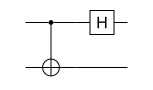

In [77]:
reverse_bell_circuit = chain(2, control(1,2=>X), put(1=>H))
plot(reverse_bell_circuit)

### 5.4 Applications: Super-Dense Coding

Let's rember our favorite Bell State **psi = |0⟩ ⊗ |0⟩ + |1⟩ ⊗ |1⟩, where |0⟩ and |1⟩ are basis states of the subsystems**

This is a classical example, Alice and Bob have 2 qubits that are maximally entangled. They decide to travel far apart, and once they split up, Alice wants to send Bob 2 bits of information (those can either be 00, 01, 10, or 11).

Because their qubits are entangled, Alice only needs to act upon her own qubit before sending it, those actions will impact both qubits, so she can send 4 states of classical information by simply sending 1 quantum bit.

- To encode 00, Alice will send her qubit to Bob, as it is 
- To encode 01, Alice will pass her qubit through an X-gate before sending it. 
- To encode 10, Alice will pass her qubit through a Z-gate before sending it. 
- To encode 11, Alice will pass her qubit through a Y-gate before sending it.

Once Bob receives the qubit, he will put both of them through the reverse bell circuit and measure them, and he'll get what Alice sent him.

In [61]:
Bell_state = ArrayReg(bit"00") + ArrayReg(bit"11") |> normalize!

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [68]:
input = ["00" "01" "10" "11"][rand(1:4)]

send_gate = input == "00" ? chain(2) :
            input == "01" ? chain(2, put(1=>X)) :
            input == "10" ? chain(2, put(1=>Z)) : chain(2, put(1=>Y))
        


nqubits: 2
chain
└─ put on (1)
   └─ Y


In [69]:
println(input)

11


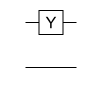

In [71]:
plot(send_gate)

In [80]:
received_bits = ((Bell_state |> send_gate) |> reverse_bell_circuit) |> r->measure(r, nshots=1)

1-element Vector{DitStr{2, 2, Int64}}:
 11 ₍₂₎

### 5.5 Applications: Teleportation

Alice now has another qubit, let's call it C.

- C = c1*|0⟩ + c2*|1⟩

She also has the qubit from the previous example, let's call it A

- A = a1*|0⟩ + a2*|1⟩ 

Bob also has the qubit from the precious example, let's call it B

- B = b1*|0⟩ + b2*|1⟩

Alice now wants to change b1 into c1 and b2 into c2, using her qubit A and the fact that A and B are entangled.

How will she do this?

1. She sends A and C through a Reverse Bell circuit.

2. After that, she measures them, and once measured, they collapse into 4 possible outcomes: 00, 01, 10, or 11.

- Measuring 00 means Bob's qubit is c1*|0⟩ + c2*|1⟩ now.

- Measuring 01 means Bob's qubit is c1*|1⟩ + c2*|0⟩ now, and if it's sent through the X gate, it will change to c1*|0⟩ + c2*|1⟩.

- Measuring 10 means Bob's qubit is c1*|0⟩ - c2*|1⟩ now, and if it's sent through the Z gate, it will change to c1*|0⟩ + c2*|1⟩.

- Measuring 11 means Bob's qubit is c1*|1⟩ - c2*|0⟩ now, and if it's sent through the Y gate, it will change to c1*|0⟩ + c2*|1⟩.

In [82]:
bell_state = ArrayReg(bit"00") + ArrayReg(bit"11") |> normalize!
C_qubit = rand_state(1)
vec(statevec(C_qubit))

2-element Vector{ComplexF64}:
 0.7127985086242892 + 0.36518418343393316im
 0.3182167931352017 + 0.507244389657913im

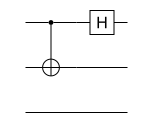

In [84]:
teleporter = chain(3, control(1,2=>X), put(1=>H))
plot(teleporter)

In [85]:
feeding = join(bell_state, C_qubit) |> teleporter
vec(statevec(feeding))

8-element Vector{ComplexF64}:
 0.35639925431214453 + 0.18259209171696655im
 0.35639925431214453 + 0.18259209171696655im
  0.1591083965676008 + 0.2536221948289564im
 -0.1591083965676008 - 0.2536221948289564im
  0.1591083965676008 + 0.2536221948289564im
 -0.1591083965676008 - 0.2536221948289564im
 0.35639925431214453 + 0.18259209171696655im
 0.35639925431214453 + 0.18259209171696655im

In [86]:
measured_qubits = measure!(RemoveMeasured(), feeding, 1:2)

11 ₍₂₎

In [87]:
final_gate = measured_qubits == "00" ? feeding :
             measured_qubits == "01" ? feeding |> chain(1, put(1=>Z)) :
             measured_qubits == "10" ? feeding |> chain(1, put(1=>X)) : feeding |> chain(1, put(1=>Y))

ArrayReg{2, ComplexF64, Array...}
    active qubits: 1/1
    nlevel: 2

In [88]:
vec(statevec(final_gate))

2-element Vector{ComplexF64}:
 0.3651841834339332 - 0.7127985086242893im
 0.5072443896579131 - 0.31821679313520174im

In [90]:
[vec(statevec(C_qubit)) vec(statevec(final_gate))]

2×2 Matrix{ComplexF64}:
 0.712799+0.365184im  0.365184-0.712799im
 0.318217+0.507244im  0.507244-0.318217im